In [2]:
import numpy as np
import pandas as pd

# plots
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from datetime import datetime
import matplotlib.pyplot as plt

import calendar

data_17_08 = pd.read_csv('../data/properati/properati-AR-2017-08-01-properties-sell.csv')
data_17_02 = pd.read_csv('../data/properati/properati-AR-2017-02-01-properties-sell.csv')
data_16_08 = pd.read_csv('../data/properati/properati-AR-2016-08-01-properties-sell.csv')
data_16_02 = pd.read_csv('../data/properati/properati-AR-2016-02-01-properties-sell.csv')
data_15_08 = pd.read_csv('../data/properati/properati-AR-2015-08-01-properties-sell.csv')
data_15_02 = pd.read_csv('../data/properati/properati-AR-2015-02-01-properties-sell.csv')
data_14_08 = pd.read_csv('../data/properati/properati-AR-2014-08-01-properties-sell.csv')
data_14_02 = pd.read_csv('../data/properati/properati-AR-2014-02-01-properties-sell.csv')
data_13_08 = pd.read_csv('../data/properati/properati-AR-2013-08-01-properties-sell.csv')

In [3]:
data1_frames = [data_17_08, data_17_02, data_16_08, data_16_02]
data1 = pd.concat(data1_frames)

In [4]:
# sacamos la columna id
data1 = data1.drop(['id'], axis=1)

In [5]:
data2_frames = [data_15_08, data_15_02, data_14_08, data_14_02, data_13_08]
data2 = pd.concat(data2_frames)

In [6]:
data_frames = [data1, data2]
data = pd.concat(data_frames)

# Estructura de los datos

In [7]:
data.head(3)

,country_name,created_on,currency,description,expenses,extra,floor,geonames_id,image_thumbnail,lat,...,price_per_m2,price_usd_per_m2,properati_url,property_type,rooms,state_name,surface_covered_in_m2,surface_in_m2,surface_total_in_m2,title
0,Argentina,2012-09-19,USD,CASA CON LOCAL EN VENTA EN PADUA.2 DORMITORIOS...,NaN,NaN,NaN,3429244.0,https://thumbs4.properati.com/1/ufoyqwscVk8n3e...,NaN,...,1290.322581,360.36036,http://www.properati.com.ar/udh_venta_casa_mer...,house,NaN,Bs.As. G.B.A. Zona Oeste,93.0,NaN,333.0,CASA EN VENTA
1,Argentina,2012-10-22,USD,CHALET VENTA 4 AMBIENTES PADUA.EXCELENTE CHALE...,NaN,NaN,NaN,3429244.0,https://thumbs4.properati.com/5/I5RS_jAIUseo9H...,NaN,...,1000.000000,1000.00000,http://www.properati.com.ar/20hi_venta_casa_me...,house,NaN,Bs.As. G.B.A. Zona Oeste,220.0,NaN,220.0,CASA EN VENTA
2,Argentina,2012-11-01,NaN,DTO. 2 AMB. C/ VISTA PLENA AL 6 X 3DOMITORIO ...,NaN,NaN,NaN,3430863.0,https://thumbs4.properati.com/5/VjDOdzm9n8uqZu...,-38.019951,...,NaN,NaN,http://www.properati.com.ar/336o_venta_departa...,apartment,2.0,Buenos Aires Costa Atlántica,42.0,NaN,NaN,DTO. 2 AMB. C/ VISTA PLENA AL MAR


In [8]:
data.dtypes

country_name                   object
created_on                     object
currency                       object
description                    object
expenses                       object
extra                          object
floor                         float64
geonames_id                   float64
image_thumbnail                object
lat                           float64
lat-lon                        object
lon                           float64
operation                      object
place_name                     object
place_with_parent_names        object
price                         float64
price_aprox_local_currency    float64
price_aprox_usd               float64
price_per_m2                  float64
price_usd_per_m2              float64
properati_url                  object
property_type                  object
rooms                         float64
state_name                     object
surface_covered_in_m2         float64
surface_in_m2                 float64
surface_tota

In [13]:
# formato de fechas
data.created_on = pd.to_datetime(data.created_on, format='%Y/%m/%d')
data['year'] = data['created_on'].map(lambda x: x.year)
data['month'] = data.created_on.dt.month.apply(lambda x: calendar.month_name[x])

In [11]:
#Cuantos lugares (o provincias) reflejan los avisos
data['state_name'].value_counts()

Capital Federal                 78606
Bs.As. G.B.A. Zona Norte        74991
Bs.As. G.B.A. Zona Oeste        42015
Buenos Aires Costa Atlántica    37457
Bs.As. G.B.A. Zona Sur          28232
Córdoba                         24663
Santa Fe                        21276
Buenos Aires Interior            9546
Mendoza                          1936
Río Negro                        1885
Misiones                         1714
Neuquén                          1683
Entre Ríos                       1626
Tucumán                          1133
San Luis                          762
Salta                             707
Corrientes                        693
La Pampa                          620
Chubut                            446
Catamarca                         334
Chaco                             173
San Juan                          138
Tierra Del Fuego                  134
Jujuy                              80
Santa Cruz                         69
Formosa                            66
La Rioja    

In [12]:
# Filtro por Capital Federal y GBA
data = data.loc[(data.state_name=='Capital Federal') | (data.state_name.str.contains('G.B.A'))]

In [14]:
data.isnull().sum()

country_name                       0
created_on                         0
currency                       26919
description                       16
expenses                      197677
extra                         223844
floor                         200618
geonames_id                    47886
image_thumbnail                 4523
lat                            71651
lat-lon                        71651
lon                            71651
operation                          0
place_name                        54
place_with_parent_names            0
price                          23435
price_aprox_local_currency     23435
price_aprox_usd                23435
price_per_m2                   49583
price_usd_per_m2               85765
properati_url                      0
property_type                      0
rooms                         115319
state_name                         0
surface_covered_in_m2          29197
surface_in_m2                 223844
surface_total_in_m2            62816
t

In [15]:
data.describe()

,floor,geonames_id,lat,lon,price,price_aprox_local_currency,price_aprox_usd,price_per_m2,price_usd_per_m2,rooms,surface_covered_in_m2,surface_in_m2,surface_total_in_m2,year
count,23226.000000,1.759580e+05,152193.000000,152193.000000,2.004090e+05,2.004090e+05,2.004090e+05,1.742610e+05,1.380790e+05,108525.000000,194647.000000,0.0,161028.000000,223844.00000
mean,17.799836,3.488861e+06,-34.587684,-58.513448,3.382800e+05,4.345470e+06,2.567219e+05,4.453948e+03,2.026821e+03,2.988030,150.070451,NaN,265.065603,2016.30515
std,126.350565,4.032057e+05,0.849350,0.704857,7.763883e+05,6.636703e+06,3.928122e+05,1.973984e+04,5.306152e+03,1.490981,3272.695499,NaN,1674.710127,0.75282
min,1.000000,3.427208e+06,-41.167596,-122.419415,0.000000e+00,0.000000e+00,0.000000e+00,6.275958e-02,0.000000e+00,1.000000,0.000000,NaN,0.000000,2012.00000
25%,2.000000,3.429617e+06,-34.639315,-58.587002,1.000000e+05,1.593656e+06,9.500000e+04,1.521739e+03,1.085714e+03,2.000000,47.000000,NaN,52.000000,2016.00000
50%,3.000000,3.430787e+06,-34.600007,-58.480858,1.700000e+05,2.646675e+06,1.580000e+05,2.096154e+03,1.760000e+03,3.000000,80.000000,NaN,99.000000,2016.00000
75%,6.000000,3.435506e+06,-34.547926,-58.412990,3.300000e+05,4.940460e+06,2.900000e+05,2.933333e+03,2.450000e+03,4.000000,167.000000,NaN,248.000000,2017.00000
max,7071.000000,6.693230e+06,52.619706,5.011710,1.234568e+08,8.212711e+08,5.000000e+07,4.000000e+06,1.271027e+06,32.000000,987897.000000,NaN,200000.000000,2017.00000


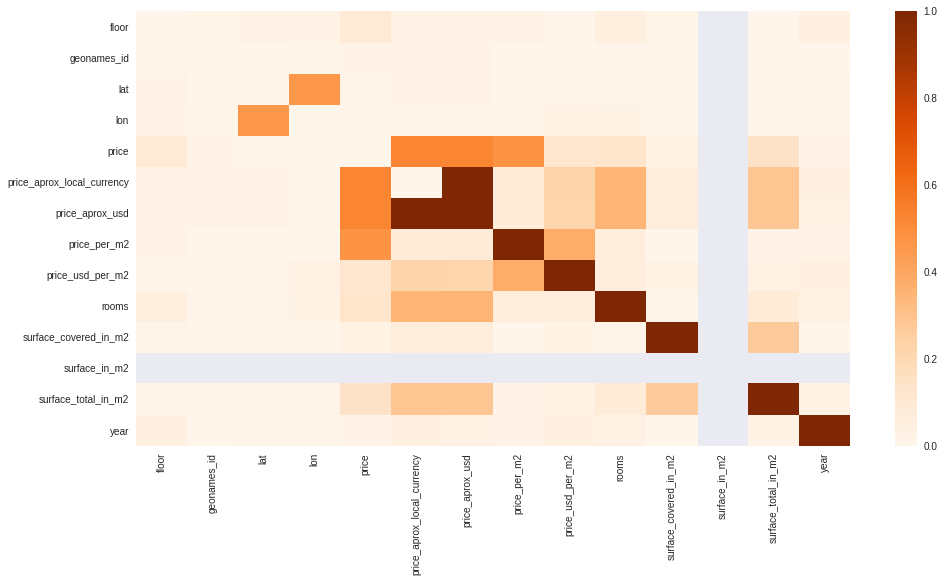

In [13]:
# este podríamos sacarlo 
fig, ax = plt.subplots(figsize=(16,8))
cor = data.corr().abs()
cor.values[[np.arange(6)]*2] = 0
sns.heatmap(cor,cmap='Oranges');

# Qué cantidad de avisos se registraron por año?

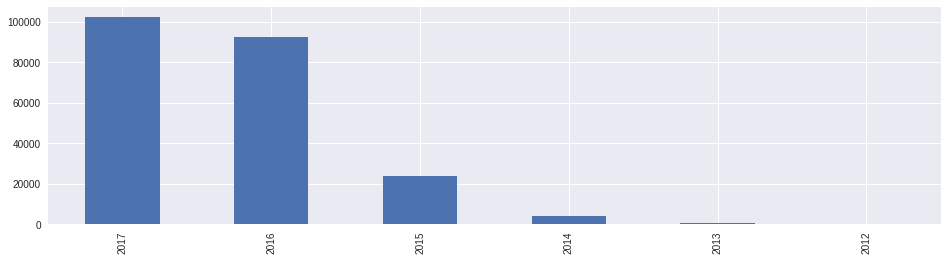

In [19]:
data['year'].value_counts()[0:6].plot(kind='bar',figsize=(16,4));

In [ ]:
# puede obsevase que la mayor cantidad de avisos se publicaron en el año 2017, si bien es poca la diferencia
# con respecto al año 2016 esta diferencia podría ser aún mayor al terminar el año 2017 ya los datos registrados para este
# año son hasta agosto

# cuáles son los principales lugares donde se registraron la mayor cantidad de avisos?

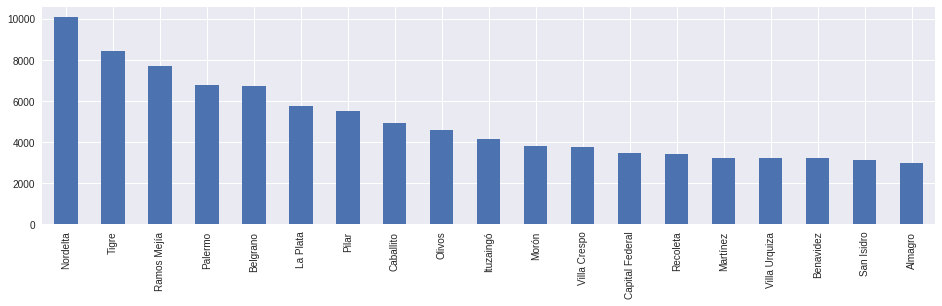

In [14]:
# top 20 lugares con mas ventas
data['place_name'].value_counts()[0:19].plot(kind='bar',figsize=(16,4));

# ¿Qué tipo de propiedad son las que más se publicaron?

In [20]:
apartment_year = data.loc[data.property_type == 'apartment',['year']]
house_year = data.loc[data.property_type == 'house',['year']]
ph_year = data.loc[data.property_type == 'PH',['year']]
store_year = data.loc[data.property_type == 'store',['year']]

In [22]:
data_apartment = apartment_year['year'].value_counts().sort_index()
data_house = house_year['year'].value_counts().sort_index()
data_ph = ph_year['year'].value_counts().sort_index()
data_store = store_year['year'].value_counts().sort_index()

data_apartment.rename('Apartment', inplace=True)
data_house.rename('House', inplace=True)
data_ph.rename('PH', inplace=True)
data_store.rename('Store', inplace=True)

data_by_year = pd.concat([data_apartment,data_house, data_ph, data_store], axis=1)
print('datos por año\n',data_by_year)

datos por año
       Apartment  House      PH   Store
2012        NaN      3     NaN     NaN
2013      193.0    181    34.0     9.0
2014     1768.0   2011   351.0   218.0
2015    12654.0   8938  1739.0   792.0
2016    49581.0  34067  5617.0  3300.0
2017    58816.0  34570  5551.0  3451.0


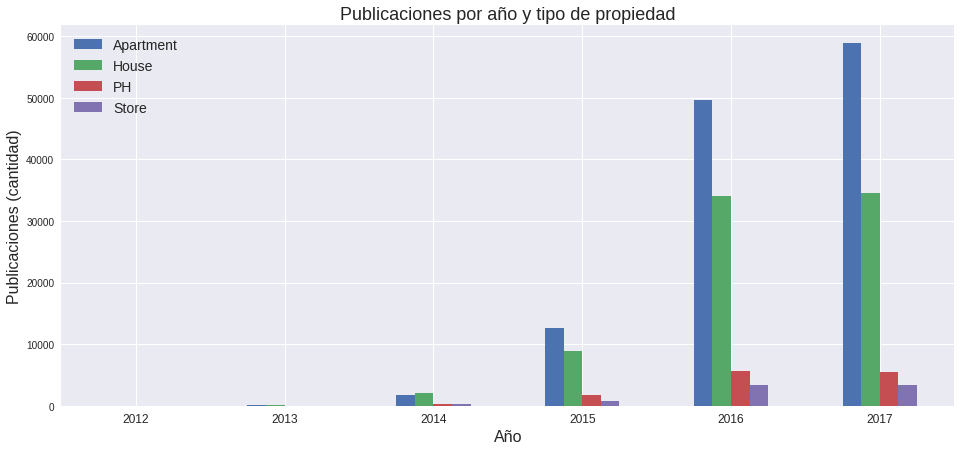

In [24]:
year = ['2012','2013','2014','2015','2016','2017']
ax2 = data_by_year.plot(kind='bar', figsize=(16,7))
ax2.set_title('Publicaciones por año y tipo de propiedad', fontsize=18)
ax2.set_xlabel('Año', fontsize=16)
ax2.set_ylabel('Publicaciones (cantidad)', fontsize=16)
ax2.set_xticklabels(year,rotation='horizontal', fontsize=12)
ax2.legend(prop={'size':14});

# porcentaje de los tipos de propiedades durante los años

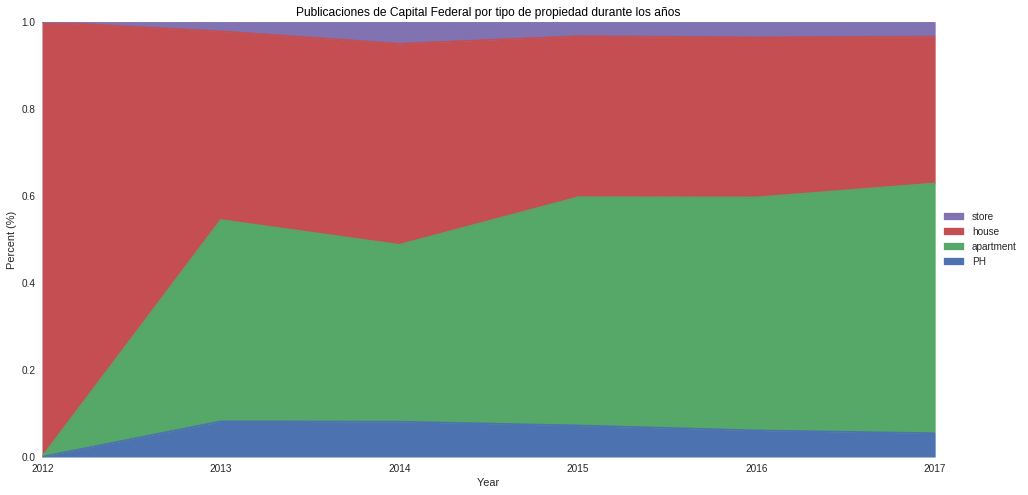

In [32]:
property_type_by_year = pd.DataFrame(data.groupby(['property_type','year']).size())
property_type_by_year.columns = ['num']

property_type_by_year.reset_index(inplace=True)

pivoted = pd.pivot_table(property_type_by_year,values='num',columns='property_type', index='year')
pivoted = pivoted.divide(pivoted.sum(axis=1), axis=0)

f = plt.figure()
plt.title('Publicaciones de Capital Federal por tipo de propiedad durante los años', color='black')
ax = pivoted.plot(kind='area', stacked=True,figsize=(16,8),ax=f.gca())
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles[::-1], labels[::-1],loc='center left', bbox_to_anchor=(1.0, 0.5))
ax.set_ylabel('Percent (%)');
ax.set_xlabel('Year');
ax.set_ylim(0,1)
plt.show()

# Superficie total promedio a través del tiempo

In [37]:
grouped = data[['property_type','surface_total_in_m2','created_on']].dropna()
grouped.created_on = pd.to_datetime(grouped.created_on, format='%Y/%m/%d')
Prop_TotalSurf =grouped[['property_type','surface_total_in_m2']]
Prop_TotalSurf['Periodo'] = grouped['created_on'].map(lambda x: x.strftime('%Y-%m'))
#En algunos casos la superficie total era demasiada
#decidí tomar el promedio dentro de un rango de valores más o menos "usual"
Prop_TotalSurf = Prop_TotalSurf.loc[((Prop_TotalSurf.surface_total_in_m2<1000) &\
                                     (Prop_TotalSurf.surface_total_in_m2>100) &\
                                    (Prop_TotalSurf.property_type== 'house')) |\
                                    ((Prop_TotalSurf.surface_total_in_m2<500) &\
                                    ((Prop_TotalSurf.property_type== 'apartment')|\
                                     (Prop_TotalSurf.property_type== 'PH')) &\
                                    (Prop_TotalSurf.surface_total_in_m2>18))\
                                   ]

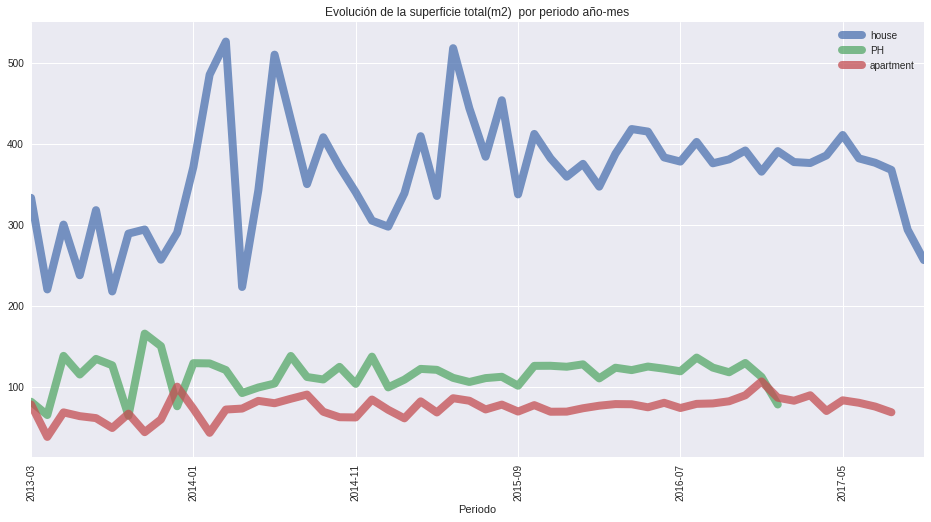

In [38]:
plt.figure()

Prop_TotalSurf.loc[Prop_TotalSurf.property_type.str.contains('house'),['property_type','surface_total_in_m2','Periodo']].groupby('Periodo')\
                .mean().loc[:,'surface_total_in_m2'].plot(rot=90,linewidth=8,figsize=(16,8),alpha=0.75,label='house',title='Evolución de la superficie total(m2) por periodo año-mes');

Prop_TotalSurf.loc[Prop_TotalSurf.property_type.str.contains('PH'),['property_type','surface_total_in_m2','Periodo']].groupby('Periodo')\
                .mean().loc[:,'surface_total_in_m2'].plot(rot=90,linewidth=8,figsize=(16,8),alpha=0.75,label='PH',title='Evolución de la superficie total(m2)  por periodo año-mes')

Prop_TotalSurf.loc[Prop_TotalSurf.property_type.str.contains('apartment'),['property_type','surface_total_in_m2','Periodo']].groupby('Periodo')\
                .mean().loc[:,'surface_total_in_m2'].plot(rot=90,linewidth=8,figsize=(16,8),alpha=0.75,label='apartment',title='Evolución de la superficie total(m2)  por periodo año-mes')
plt.legend();

# Número total de ambientes de los departamentos en venta

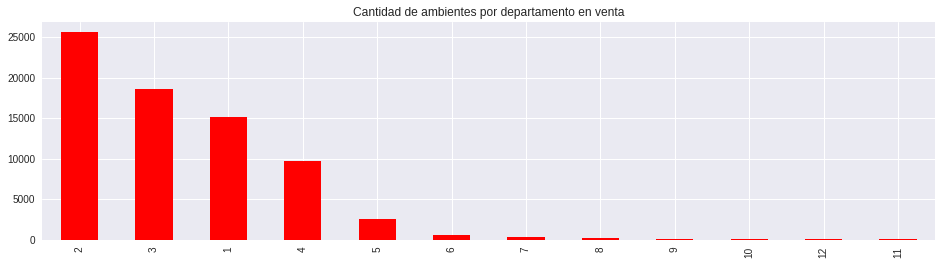

In [28]:
rooms_per_apartment = data.loc[(data.property_type=='apartment') & (data.rooms<13) ,['property_type','rooms']].dropna()
rooms_per_apartment['rooms'].astype(int).value_counts().plot(kind='bar',figsize=(16,4), title="Cantidad de ambientes por departamento en venta",color='red');

# ¿Cuáles son los meses en los cuales se dan la mayor cantidad de avisos?

In [33]:
data.month.value_counts()

July         55556
February     23091
June         17420
August       16919
January      16417
November     15493
May          14670
December     14127
April        14114
October      13316
March        13312
September     9409
Name: month, dtype: int64

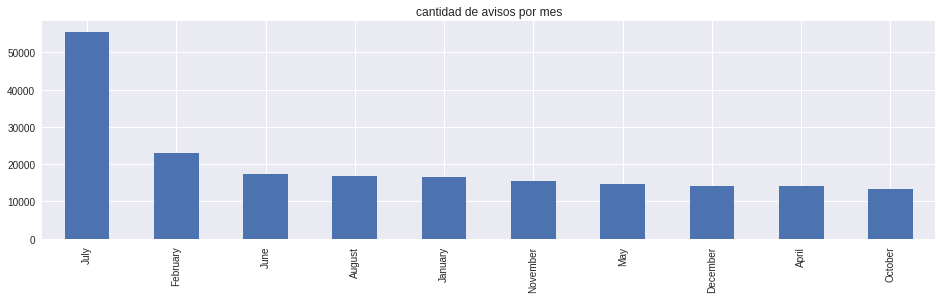

In [35]:
data.month.value_counts()[0:10].plot(kind='bar',figsize=(16,4), title="cantidad de avisos por mes");

In [40]:
# Heatmap - top 30 lugares con mas ventas por mes
# este se podría sacar 
grouped = data[['place_name', 'month']].groupby(['place_name','month'])['month'].agg(['count'])
grouped_by_month = grouped.loc[grouped['count'] > 0,:].sort_values('count', ascending=False).head(30)
grouped_by_month = grouped_by_month.reset_index()

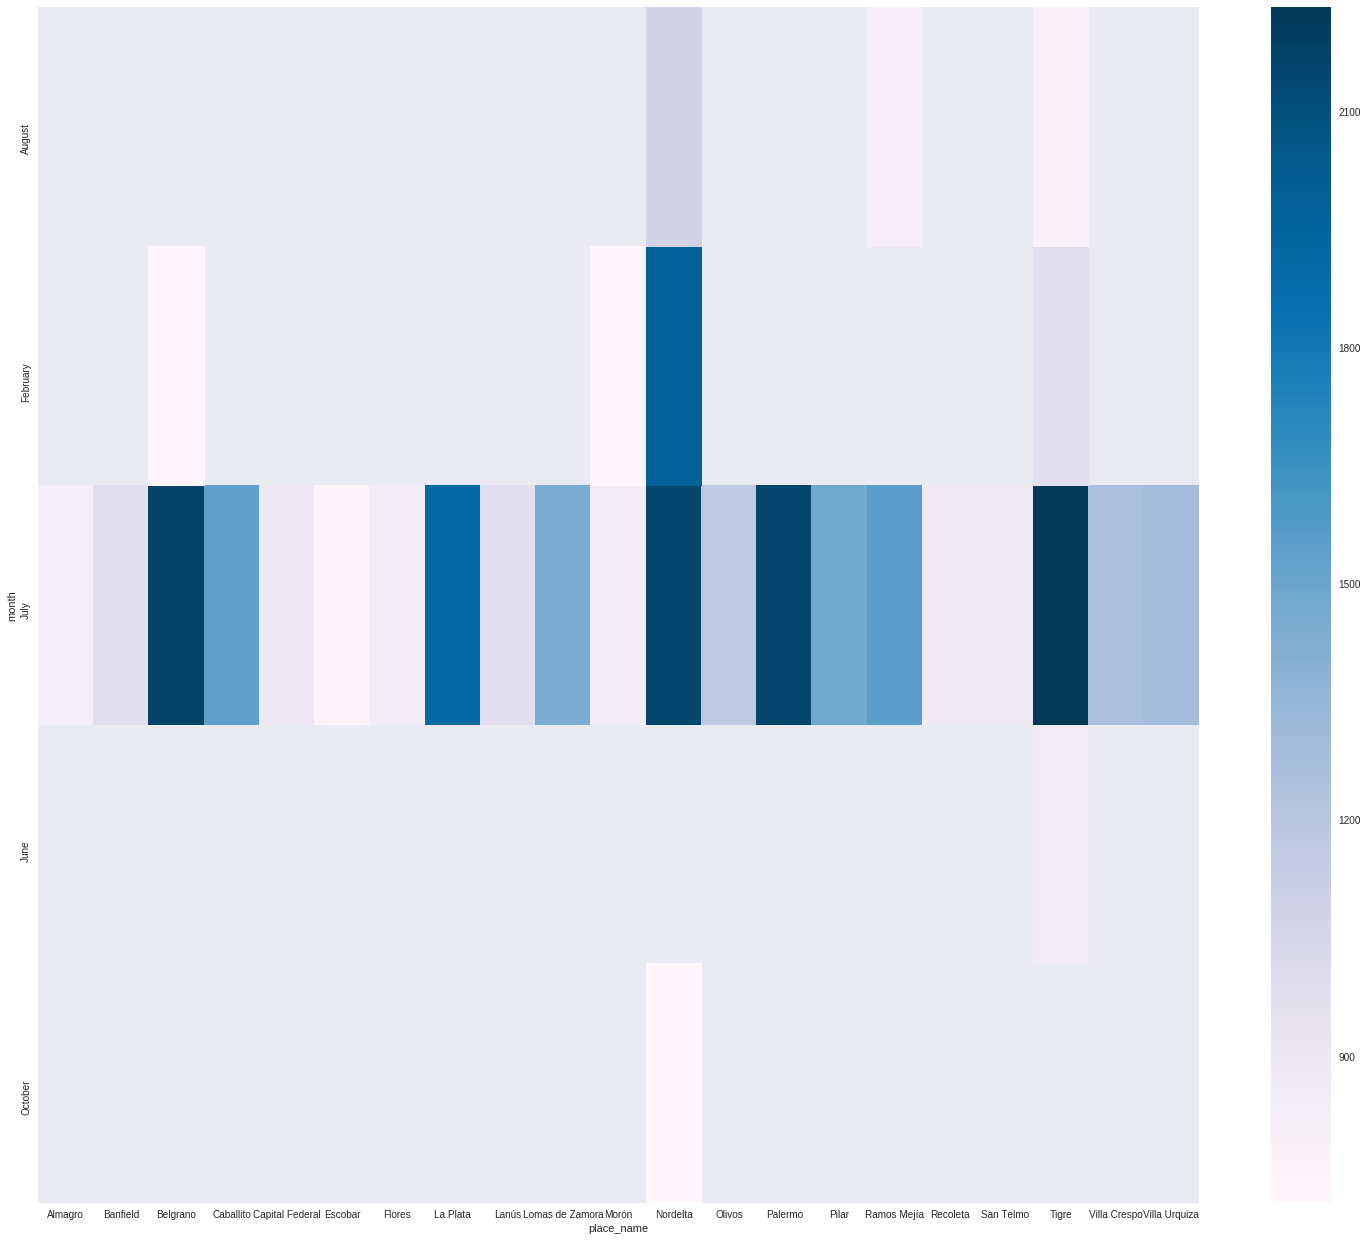

In [41]:
import seaborn as sns

grouped_by_month = pd.pivot_table(grouped_by_month, values='count', columns='place_name', index='month')
fig, ax = plt.subplots(figsize=(26,22))
sns.heatmap(grouped_by_month,cmap='PuBu');

# ¿En qué año y qué tipo de propiedad se registró la mayor cantidad de avisos?

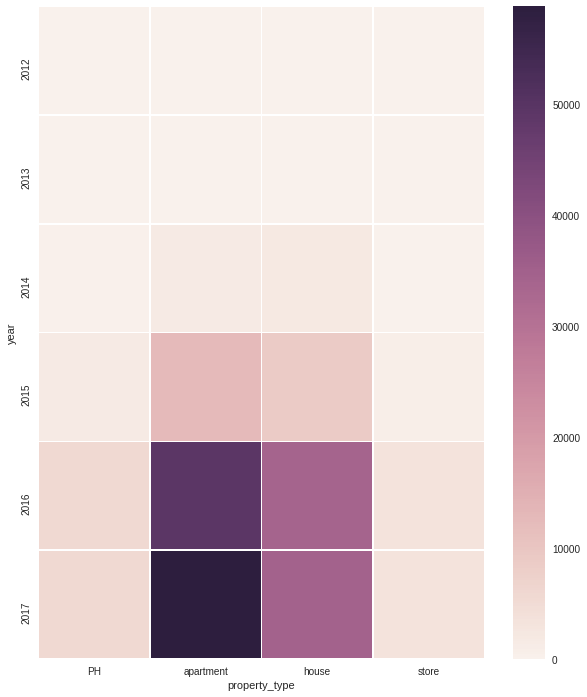

In [43]:
# cantidad de ventas año y tipo de propiedad

data_grouped = data.groupby(['year','property_type']).size().reset_index()
data_grouped.columns=['year','property_type','size']
data_grouped = data_grouped.pivot(index='year', columns='property_type',values='size')
data_grouped.fillna(0,inplace=True)
fig, ax = plt.subplots(figsize=(10,12))
sns.heatmap(data_grouped, annot=False, linewidths=.5, ax=ax);

# ¿ qué porcentaje de las ventas representa Capital Federal y G.B.A. ?

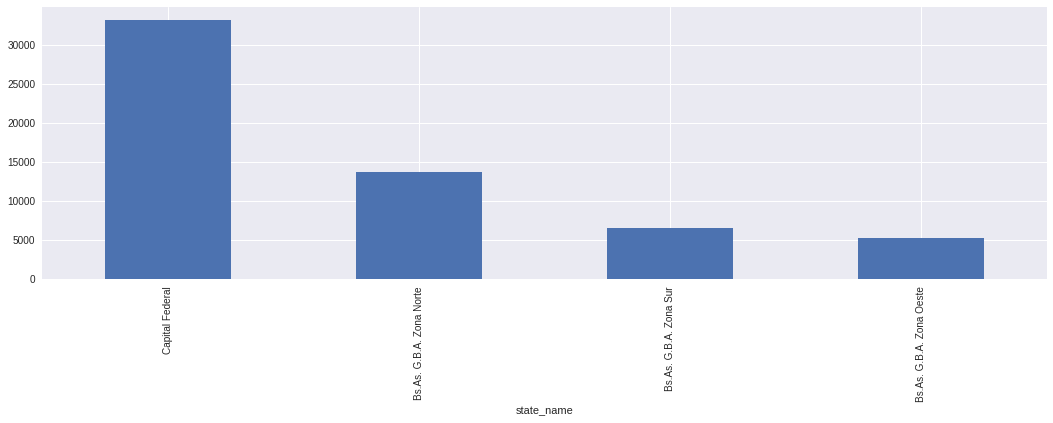

In [70]:
filtered = data.loc[(data.year == 2017) & (data.property_type == 'apartment')]

grouped = filtered[['state_name','price_usd_per_m2']].groupby('state_name').agg([np.size, np.mean])
# por lo menos 50 ventas
grouped.loc[grouped[('price_usd_per_m2', 'size')] > 50, : ][('price_usd_per_m2','size')].sort_values(ascending=False)[0:20].plot(kind='bar',figsize=(18,5));

In [39]:
#De cuántos ambientes son las casas ofrecidas en Gran Buenos Aires
gba= data.loc[(data.property_type == 'house') & (data.rooms<13) & (data.state_name.str.contains('G.B.A')),\
             ['created_on','price_usd_per_m2','place_name','rooms']]
gba.created_on = pd.to_datetime(gba.created_on, format='%Y/%m/%d')
gba.rooms.value_counts()

4.0     8428
3.0     6883
5.0     5131
6.0     1868
2.0     1405
7.0      811
1.0      275
8.0      274
9.0       95
10.0      91
11.0      18
12.0      12
Name: rooms, dtype: int64

In [40]:
gba = gba.loc[gba.rooms==4,:] #me quedo con la cantidad mas significativa
gba.place_name.value_counts()
gba = gba.loc[:,['price_usd_per_m2','created_on','place_name']].dropna()
gba.place_name.value_counts()

Ramos Mejía                              556
Haedo                                    321
Ituzaingó                                243
Tigre                                    192
Villa Luzuriaga                          115
Caseros                                  110
Olivos                                   106
San Justo                                101
Escobar                                  101
Villa Ballester                           86
Pilar                                     83
Nordelta                                  81
Villa Sarmiento                           74
General San Martín                        72
El Palomar                                68
Castelar                                  65
Benavidez                                 64
La Plata                                  60
Morón                                     57
Maschwitz                                 53
Presidente Perón                          50
Lomas del Mirador                         48
San Miguel

In [41]:
selected_places_gba = gba.loc[(gba.place_name == 'Ramos Mejía') | \
                                        (gba.place_name == 'Haedo' ) | \
                                        (gba.place_name == 'Ituzaingó') | \
                                        (gba.place_name== 'Tigre') | \
                                        (gba.place_name== 'Pilar') | \
                                        (gba.place_name== 'Escobar'),\
                                        ['place_name','price_usd_per_m2','created_on']].\
                                        pivot_table(index='created_on',columns='place_name')
selected_places_gba

price_usd_per_m2                                         \
place_name          Escobar        Haedo    Ituzaingó        Pilar   
created_on                                                           
2013-05-24              NaN          NaN          NaN  1063.842871   
2013-07-22              NaN          NaN          NaN          NaN   
2014-01-13              NaN          NaN          NaN          NaN   
2014-03-29              NaN          NaN   340.909091          NaN   
2014-04-29              NaN          NaN   309.090909          NaN   
2014-05-27      2750.000000          NaN          NaN          NaN   
2014-07-07              NaN          NaN   253.333333          NaN   
2014-07-08              NaN          NaN  1105.769231          NaN   
2014-08-14      3250.000000          NaN          NaN          NaN   
2014-09-20              NaN          NaN          NaN          NaN   
2014-10-11              NaN          NaN   187.500000          NaN   
2014-11-14              NaN   990.779186          NaN          NaN   
2014-11-21              NaN          NaN          NaN          NaN   
2014-11-28              NaN          NaN          NaN          NaN   
2014-12-02              NaN          NaN          NaN          NaN   
2014-12-11              NaN          NaN   314.009662          NaN   
2015-01-08              NaN          NaN   350.526316          NaN   
2015-01-11              NaN  1066.666667          NaN          NaN   
2015-01-17              NaN          NaN   333.333333          NaN   
2015-01-30       378.947368          NaN          NaN          NaN   
2015-02-13              NaN          NaN          NaN          NaN   
2015-02-18              NaN          NaN          NaN          NaN   
2015-02-27              NaN  1166.666667          NaN          NaN   
2015-03-01              NaN          NaN          NaN          NaN   
2015-03-14              NaN          NaN          NaN          NaN   
2015-03-16              NaN          NaN          NaN          NaN   
2015-03-18              NaN  1198.076923          NaN          NaN   
2015-03-24              NaN          NaN   460.000000          NaN   
2015-04-08              NaN  1060.606061          NaN          NaN   
2015-04-16              NaN          NaN          NaN          NaN   
...                     ...          ...          ...          ...   
2017-04-18              NaN  1116.071429          NaN          NaN   
2017-04-21       316.062176  1363.636364   363.636364          NaN   
2017-04-22              NaN          NaN          NaN          NaN   
2017-04-25              NaN  1923.076923          NaN          NaN   
2017-04-28              NaN          NaN   495.847424   314.285714   
2017-05-04              NaN  1318.181818          NaN          NaN   
2017-05-05              NaN          NaN   875.000000          NaN   
2017-05-10              NaN          NaN   349.584550          NaN   
2017-05-15              NaN  1333.333333          NaN          NaN   
2017-05-23              NaN          NaN          NaN          NaN   
2017-05-24              NaN  1200.000000          NaN          NaN   
2017-05-27              NaN          NaN          NaN   405.405405   
2017-05-30              NaN  1740.350877   775.000000          NaN   
2017-05-31              NaN   783.333333          NaN          NaN   
2017-06-05              NaN          NaN   633.333333          NaN   
2017-06-09              NaN  1143.827593          NaN          NaN   
2017-06-10              NaN          NaN          NaN   445.000000   
2017-06-17              NaN   855.546622          NaN          NaN   
2017-06-20              NaN   451.649233          NaN          NaN   
2017-06-22              NaN  1011.914894          NaN          NaN   
2017-06-26              NaN   753.524620          NaN          NaN   
2017-07-04              NaN          NaN   878.917910          NaN   
2017-07-10              NaN   482.379438          NaN          NaN   
2017-07-11           

In [42]:
selected_places_gba.columns = selected_places_gba.columns.droplevel()
meds = selected_places_gba.median()
selected_places_gba = selected_places_gba[meds.index]

In [43]:
meds.sort_values(ascending=False)

place_name
Ramos Mejía    1293.309438
Haedo          1043.460925
Pilar          1029.411765
Escobar         900.000000
Tigre           861.320133
Ituzaingó       673.538961
dtype: float64

In [44]:
Media_price = gba.loc[(gba.place_name == 'Ramos Mejía') | \
                                        (gba.place_name == 'Haedo' ) | \
                                        (gba.place_name == 'Ituzaingó') | \
                                        (gba.place_name== 'Tigre') | \
                                        (gba.place_name== 'Pilar') | \
                                        (gba.place_name== 'Escobar'),
                                        ['price_usd_per_m2']].mean()
Media_price

price_usd_per_m2    1162.025162
dtype: float64

# Cuánto varía el precio en usd por m2 de las casas en G.B.A ?

[None]

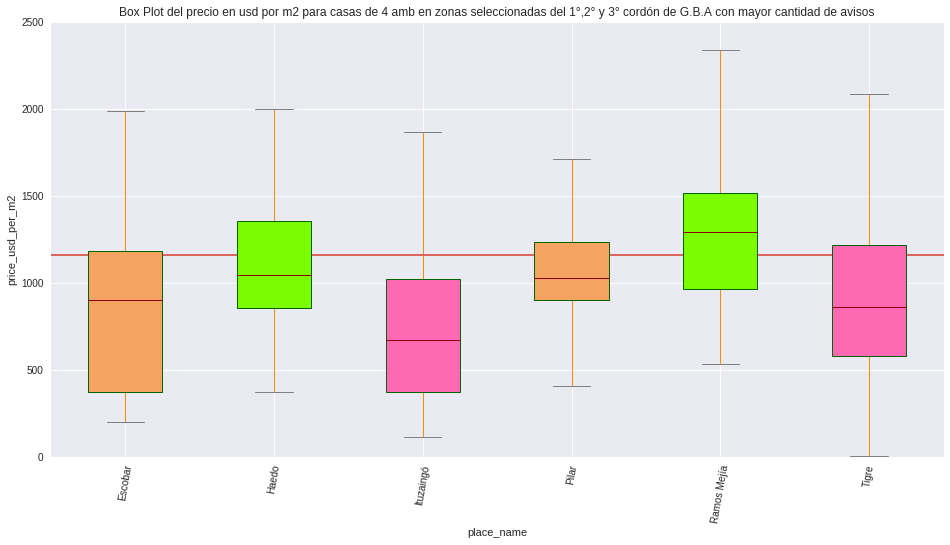

In [45]:
props = dict(boxes="DarkGreen", whiskers="DarkOrange", medians="DarkRed", caps="Gray")
boxplot=selected_places_gba.plot.box(return_type='dict', figsize=(16,8),rot=80,title='Box Plot del precio en usd por m2 para casas de 4 amb en zonas seleccionadas del 1°,2° y 3° cordón de G.B.A con mayor cantidad de avisos',color=props, patch_artist=True);

ax=plt.gca()
ax.set_ylim([0,2500]);
ax.set_ylabel('price_usd_per_m2');
ax.set_xlabel('place_name');
plt.axhline(Media_price.price_usd_per_m2,color=sns.xkcd_rgb["pale red"])

boxplot['boxes'][0].set( facecolor = 'sandybrown' )
boxplot['boxes'][3].set( facecolor = 'sandybrown' )
boxplot['boxes'][1].set( facecolor = 'lawngreen' )
boxplot['boxes'][4].set( facecolor = 'lawngreen' )
boxplot['boxes'][2].set( facecolor = 'hotpink' )
boxplot['boxes'][5].set( facecolor = 'hotpink' )

In [46]:
#De cuántos ambientes son las casas ofrecidas en Capital Federal
caba= data.loc[(data.property_type == 'house') & (data.rooms<13) & (data.state_name.str.contains('Capital')),\
             ['created_on','price_usd_per_m2','place_name','rooms']]
caba.created_on = pd.to_datetime(caba.created_on, format='%Y/%m/%d')
caba.rooms.value_counts()

5.0     661
4.0     569
6.0     319
3.0     213
7.0     156
1.0      65
2.0      51
8.0      38
9.0      18
10.0     18
11.0     15
12.0      7
Name: rooms, dtype: int64

In [47]:
caba = caba.loc[caba.rooms==4,['created_on','place_name','price_usd_per_m2']].dropna()
caba.place_name.value_counts()

Mataderos              27
Villa Devoto           21
Barracas               17
Liniers                15
Caballito              14
Saavedra               14
Floresta               11
Belgrano               11
Villa Urquiza          10
Villa Lugano           10
Colegiales             10
Palermo                 9
Villa del Parque        9
Flores                  8
Nuñez                   8
Villa Pueyrredón        7
Almagro                 6
Versalles               5
Capital Federal         5
Boedo                   5
Chacarita               5
Parque Chacabuco        4
Villa Luro              3
San Nicolás             3
Pompeya                 3
Parque Patricios        3
Villa Ortuzar           3
Paternal                3
Coghlan                 2
Villa Crespo            2
Monte Castro            2
Boca                    2
Velez Sarsfield         1
Abasto                  1
Villa General Mitre     1
Recoleta                1
Palermo Hollywood       1
Barrio Norte            1
Villa Real  

In [48]:
selected_places_caba = caba.loc[(caba.place_name == 'Villa Devoto') | \
                                        (caba.place_name == 'Mataderos') | \
                                        (caba.place_name== 'Barracas') | \
                                        (caba.place_name== 'Liniers') | \
                                        (caba.place_name== 'Caballito'),\
                                        ['place_name','price_usd_per_m2','created_on']].\
                                        pivot_table(index='created_on',columns='place_name')
selected_places_caba

price_usd_per_m2                                         \
place_name         Barracas    Caballito      Liniers    Mataderos   
created_on                                                           
2013-05-05       921.052632          NaN          NaN          NaN   
2013-07-19              NaN          NaN          NaN  1327.160494   
2015-09-22              NaN          NaN          NaN   932.642487   
2015-09-24              NaN          NaN  1084.033613          NaN   
2015-11-07              NaN          NaN          NaN          NaN   
2015-11-16              NaN          NaN          NaN          NaN   
2015-12-22       820.512821          NaN          NaN          NaN   
2016-03-15              NaN          NaN  1000.000000  1117.251462   
2016-03-16       983.050847          NaN          NaN          NaN   
2016-03-21              NaN          NaN          NaN          NaN   
2016-03-23              NaN          NaN          NaN          NaN   
2016-04-04      1000.000000          NaN          NaN          NaN   
2016-04-23              NaN          NaN          NaN          NaN   
2016-04-26       968.992248          NaN          NaN          NaN   
2016-04-27              NaN          NaN          NaN   813.953488   
2016-04-30              NaN          NaN  1125.000000          NaN   
2016-05-06              NaN          NaN          NaN  1666.666667   
2016-06-09      1791.443850          NaN          NaN          NaN   
2016-06-24       800.000000          NaN          NaN          NaN   
2016-07-01              NaN          NaN          NaN  1734.693878   
2016-07-14              NaN          NaN  1586.538462          NaN   
2016-07-20              NaN  1833.333333          NaN   982.954545   
2016-07-26              NaN          NaN          NaN  1138.562092   
2016-08-04              NaN          NaN          NaN          NaN   
2016-08-06              NaN          NaN          NaN          NaN   
2016-08-09       671.428571          NaN          NaN          NaN   
2016-08-23       890.688259          NaN          NaN          NaN   
2016-08-25              NaN          NaN          NaN  1296.875000   
2016-08-29              NaN          NaN          NaN          NaN   
2016-08-30              NaN          NaN          NaN          NaN   
2016-09-01              NaN          NaN   727.272727          NaN   
2016-10-08              NaN          NaN          NaN          NaN   
2016-10-17              NaN          NaN          NaN  1090.730859   
2016-12-04              NaN          NaN  1637.426901          NaN   
2016-12-07              NaN  1410.526316          NaN          NaN   
2016-12-13      1117.318436          NaN          NaN          NaN   
2016-12-20              NaN          NaN          NaN  1531.914894   
2017-01-03              NaN          NaN  1069.518717          NaN   
2017-01-04              NaN  1361.111111          NaN          NaN   
2017-02-04              NaN  2272.727273          NaN          NaN   
2017-02-12              NaN          NaN          NaN   900.000000   
2017-02-16      1007.194245          NaN   827.083333          NaN   
2017-02-20              NaN          NaN          NaN          NaN   
2017-03-16              NaN          NaN          NaN          NaN   
2017-03-19              NaN   288.888889          NaN          NaN   
2017-03-28              NaN  2204.724409          NaN   842.105263   
2017-04-05              NaN  2182.389937  1543.750000          NaN   
2017-04-09              NaN          NaN  1441.176471          NaN   
2017-04-13              NaN  2000.000000          NaN          NaN   
2017-04-28              NaN  1392.857143          NaN   796.482249   
2017-05-02              NaN          NaN          NaN          NaN   
2017-05-10              NaN          NaN          NaN  1702.127660   
2017-05-24              NaN          NaN          NaN          NaN   
2017-06-07              NaN          NaN  1277.777778          NaN   
2017-06-28      1450.

In [49]:
selected_places_caba.columns = selected_places_caba.columns.droplevel()
meds = selected_places_caba.median()
selected_places_caba = selected_places_caba[meds.index]

In [50]:
meds.sort_values(ascending=False)

place_name
Villa Devoto    1800.000000
Caballito       1750.760269
Liniers         1104.516807
Mataderos       1036.842702
Barracas         976.021548
dtype: float64

In [51]:
Media_price = caba.loc[(caba.place_name == 'Barracas') | \
                                        (caba.place_name == 'Villa Devoto') | \
                                        (caba.place_name== 'Caballito') | \
                                        (caba.place_name== 'Mataderos') | \
                                        (caba.place_name== 'Liniers'),
                                        ['price_usd_per_m2']].mean()
Media_price

price_usd_per_m2    1335.710025
dtype: float64

# Cuánto varía el precio en usd por m2 de las casas en CABA ?

[None]

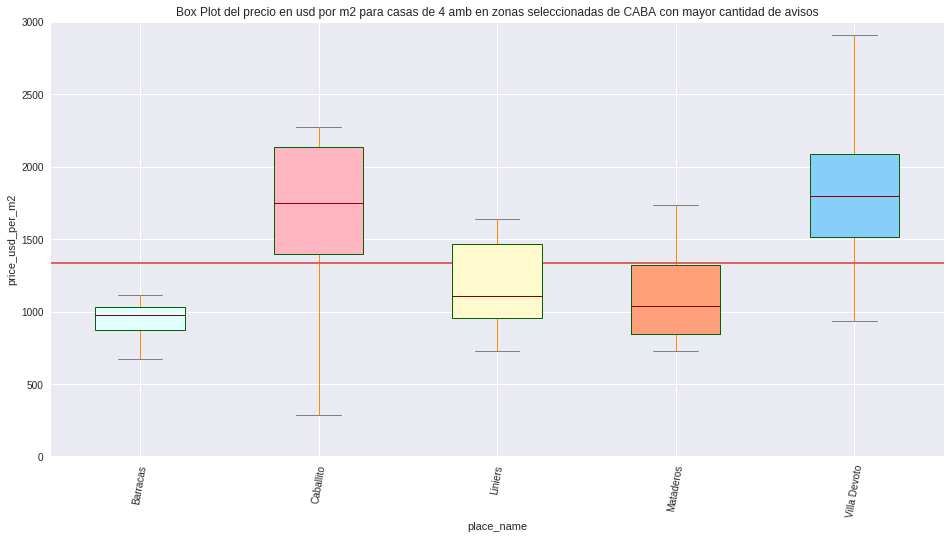

In [52]:
props = dict(boxes="DarkGreen", whiskers="DarkOrange", medians="DarkRed", caps="Gray")
boxplot=selected_places_caba.plot.box(return_type='dict', figsize=(16,8),rot=80,title='Box Plot del precio en usd por m2 para casas de 4 amb en zonas seleccionadas de CABA con mayor cantidad de avisos',color=props, patch_artist=True);

ax=plt.gca()
ax.set_ylim([0,3000]);
ax.set_ylabel('price_usd_per_m2');
ax.set_xlabel('place_name');
plt.axhline(Media_price.price_usd_per_m2,color=sns.xkcd_rgb["pale red"])

boxplot['boxes'][0].set( facecolor = 'lightcyan' )
boxplot['boxes'][3].set( facecolor = 'lightsalmon' )
boxplot['boxes'][1].set( facecolor = 'lightpink' )
boxplot['boxes'][4].set( facecolor = 'lightskyblue' )
boxplot['boxes'][2].set( facecolor = 'lemonchiffon' )

# Relación entre número de ambientes y valor de expensas

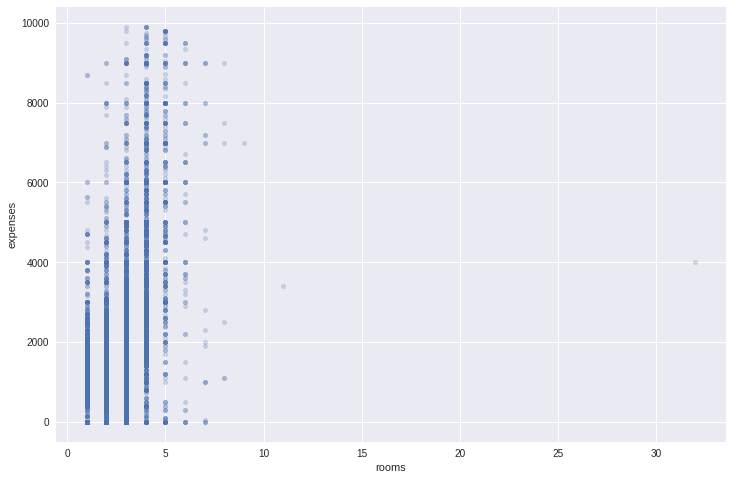

In [53]:
floor_vs_exp = data.loc[data.state_name=='Capital Federal',['expenses','rooms']].dropna()
floor_vs_exp.expenses = floor_vs_exp.expenses.astype(int)
floor_vs_exp = floor_vs_exp.loc[(floor_vs_exp.expenses<10000)]
floor_vs_exp.plot.scatter('rooms','expenses',alpha=0.25,figsize=(12,8));

In [ ]:
......................
......................
......................


# ¿ qué tipo de departamentos son los publicados ese año?

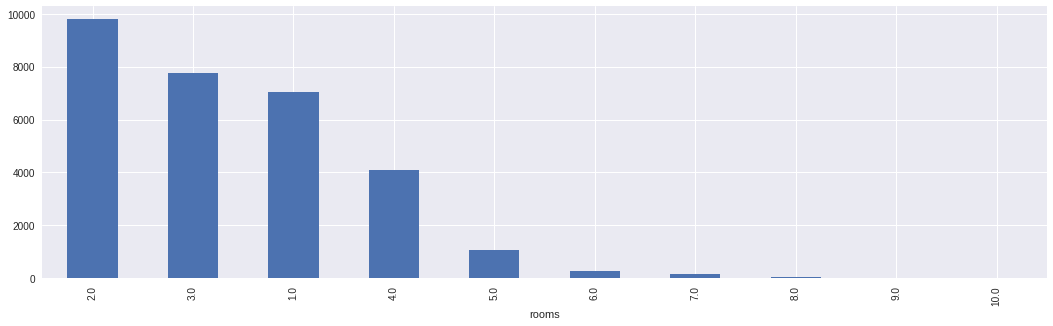

In [85]:
filtered = data.loc[(data.year == 2017) & (data.property_type == 'apartment') & (data.rooms > 0)]
grouped = filtered[['rooms','price_usd_per_m2']].groupby('rooms').agg([np.size, np.mean])
# por lo menos 50 ventas
grouped.loc[grouped[('price_usd_per_m2', 'size')] > 10, : ][('price_usd_per_m2','size')].sort_values(ascending=False).plot(kind='bar',figsize=(18,5));

# para los departamentos de 1, 2 y 3 habitaciones ¿cómo influye el piso en el precio de la propiedad ?

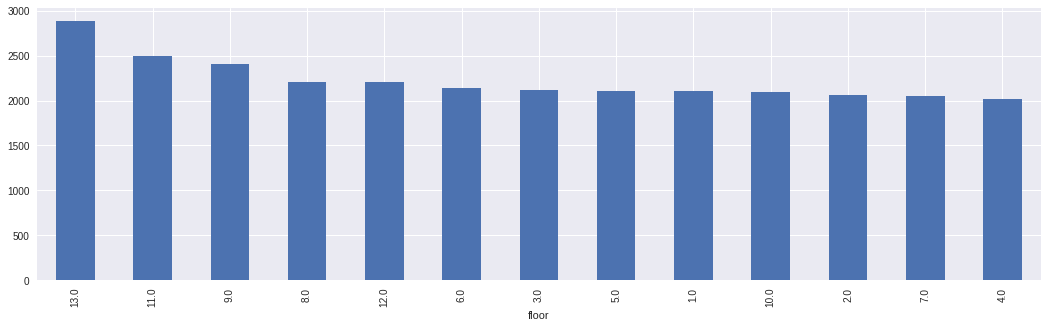

In [100]:
# rooms == 2, parece que no muestra nada interesante 

filtered = data.loc[(data.year == 2017) & (data.property_type == 'apartment') & (data.rooms == 2)]

grouped = filtered[['floor','price_usd_per_m2']].groupby('floor').agg([np.size, np.mean])

grouped.loc[grouped[('price_usd_per_m2', 'size')] > 10, : ][('price_usd_per_m2','mean')].sort_values(ascending=False).plot(kind='bar',figsize=(18,5));

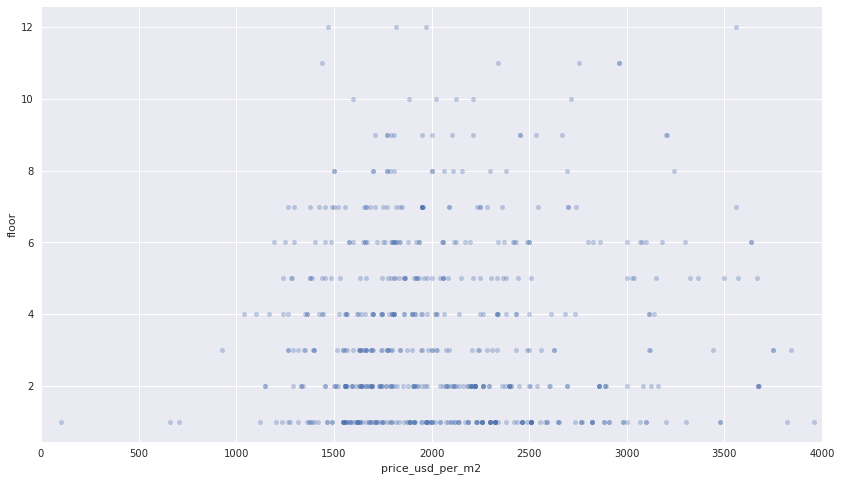

In [93]:
data_apart_floor = data[(data.year == 2017) & (data.property_type == 'apartment') & (data.floor < 13) &(data.rooms == 2)]

ax = plt.subplot(111)
data_apart_floor.plot.scatter('price_usd_per_m2','floor',alpha=0.32,figsize=(14,8),ax=ax);
ax.set_xlim(0,4000);

# ¿Cuáles son los principales lugares donde se registraron estas ventas?

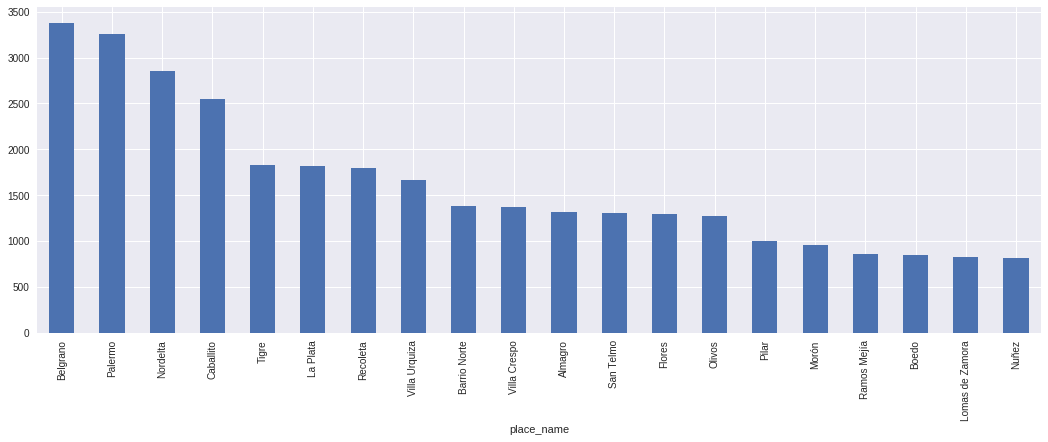

In [58]:
filtered = data.loc[(data.year == 2017) & (data.property_type == 'apartment')]
grouped = filtered.groupby(['place_name']).agg(['count'])

grouped = filtered[['place_name','price_usd_per_m2']].groupby('place_name').agg([np.size, np.mean])
# por lo menos 50 ventas
grouped.loc[grouped[('price_usd_per_m2', 'size')] > 50, : ][('price_usd_per_m2','size')].sort_values(ascending=False)[0:20].plot(kind='bar',figsize=(18,6));

# publicaciones de Capital Federal por tipo de propiedad durante los años

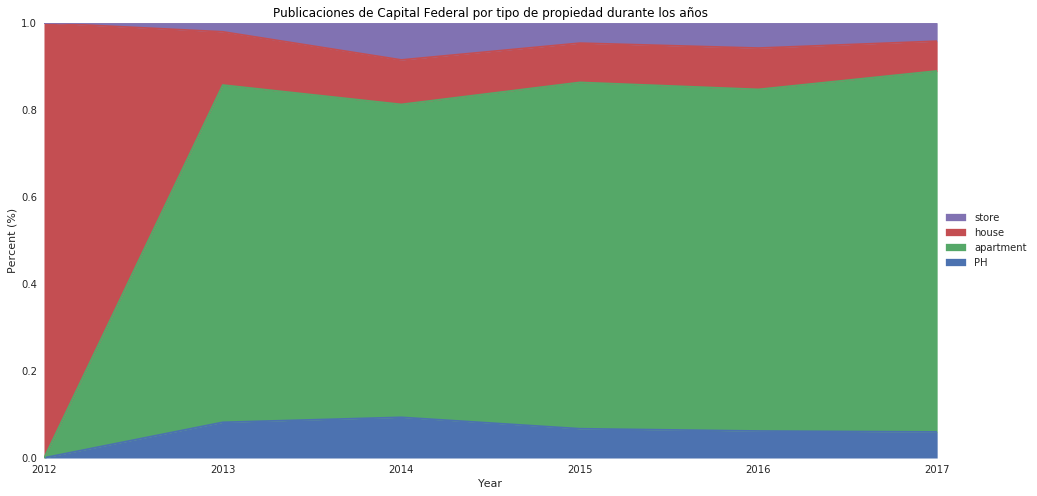

In [95]:
caba_year = pd.DataFrame(data.loc[data.state_name == 'Capital Federal'].groupby(['property_type','year']).size())
caba_year.columns = ['num']

caba_year.reset_index(inplace=True)

pivoted = pd.pivot_table(caba_year,values='num',columns='property_type', index='year')
pivoted = pivoted.divide(pivoted.sum(axis=1), axis=0)

f = plt.figure()
plt.title('Publicaciones de Capital Federal por tipo de propiedad durante los años', color='black')
ax = pivoted.plot(kind='area', stacked=True,figsize=(16,8),ax=f.gca())
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles[::-1], labels[::-1],loc='center left', bbox_to_anchor=(1.0, 0.5))
ax.set_ylabel('Percent (%)');
ax.set_xlabel('Year');
ax.set_ylim(0,1)
plt.show()

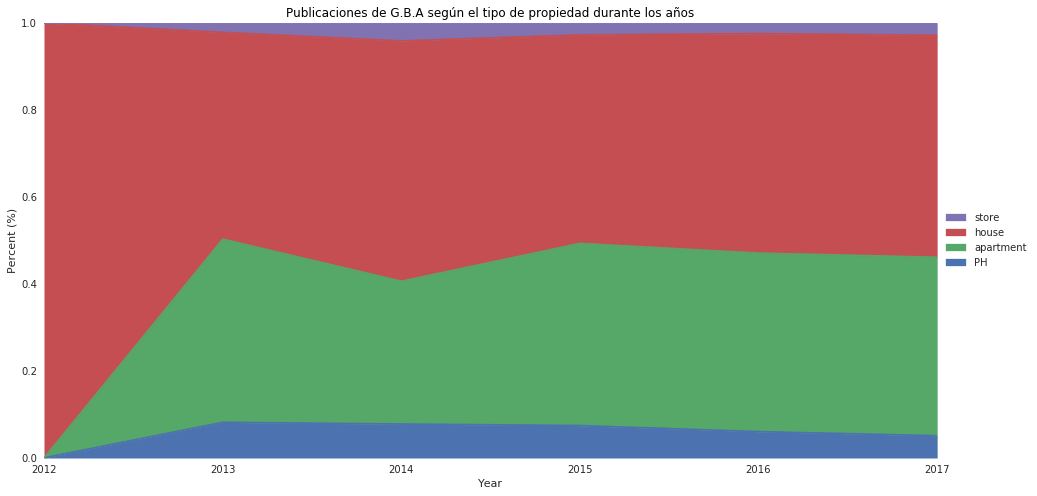

In [60]:
gba_year = pd.DataFrame(data.loc[data.state_name.str.contains('G.B.A')].groupby(['property_type','year']).size())
gba_year.columns = ['num']

gba_year.reset_index(inplace=True)

pivoted = pd.pivot_table(gba_year,values='num',columns='property_type', index='year')
pivoted = pivoted.divide(pivoted.sum(axis=1), axis=0)

f = plt.figure()
plt.title('Publicaciones de G.B.A según el tipo de propiedad durante los años', color='black')
ax = pivoted.plot(kind='area', stacked=True,figsize=(16,8),ax=f.gca())
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles[::-1], labels[::-1],loc='center left', bbox_to_anchor=(1.0, 0.5))
ax.set_ylabel('Percent (%)');
ax.set_xlabel('Year');
ax.set_ylim(0,1)
plt.show()

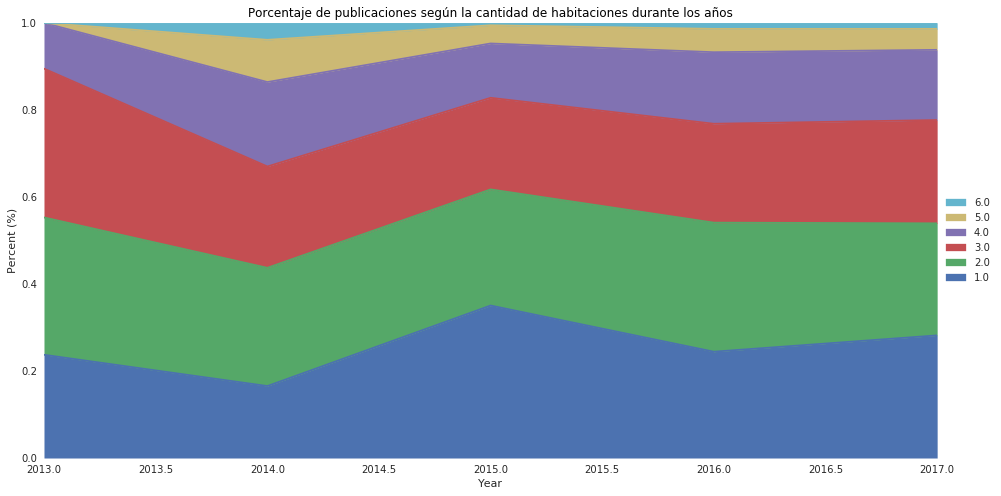

In [61]:
gy = pd.DataFrame(data.loc[(data.state_name == 'Capital Federal') & (data.property_type=='apartment')\
                          & (data.rooms < 7)].groupby(['rooms','year']).size())
gy.columns = ['num']

gy.reset_index(inplace=True)

pivoted = pd.pivot_table(gy,values='num',columns='rooms', index='year')
pivoted = pivoted.divide(pivoted.sum(axis=1), axis=0)

f = plt.figure()
plt.title('Porcentaje de publicaciones según el número de ambientes durante los años', color='black')
ax = pivoted.plot(kind='area', stacked=True,figsize=(16,8),ax=f.gca())
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles[::-1], labels[::-1],loc='center left', bbox_to_anchor=(1.0, 0.5))
ax.set_ylabel('Percent (%)');
ax.set_xlabel('Year');
ax.set_ylim(0,1)
plt.show()

In [97]:
data_depto = data[data.property_type == 'apartment']

In [98]:
data_depto = data_depto[data_depto.rooms < 7]

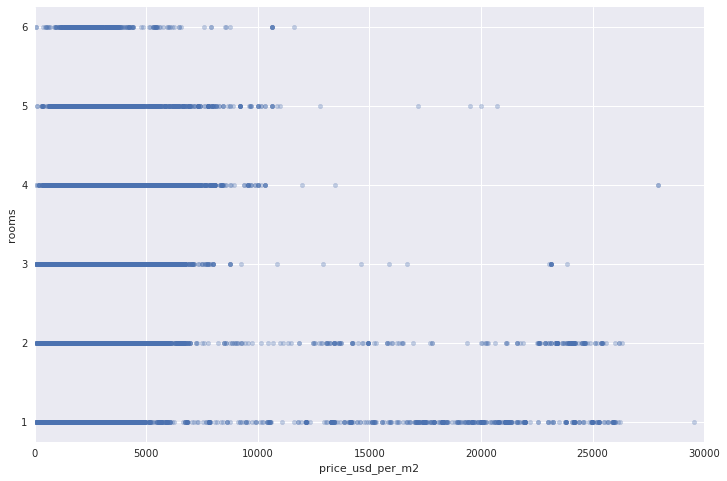

In [103]:
ax = plt.subplot(111)
data_depto.plot.scatter('price_usd_per_m2','rooms',alpha=0.32,figsize=(12,8),ax=ax);
ax.set_xlim(0,30000);

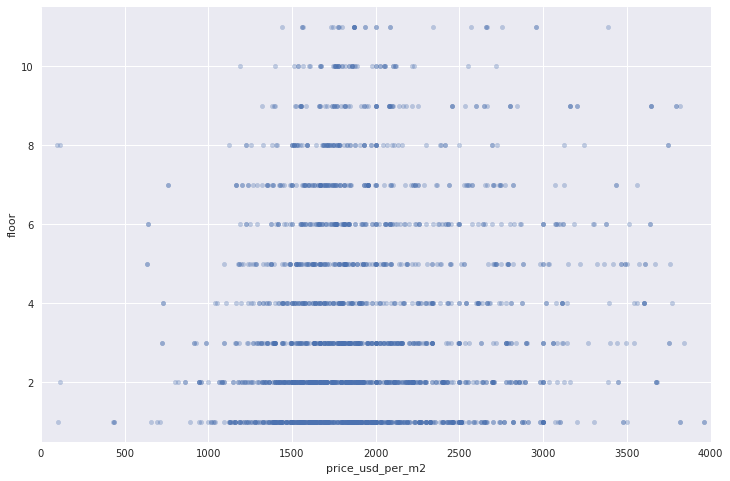

In [92]:
apartment_floor = data.loc[(data.property_type == 'apartment') & (data.rooms == 2), ['price_usd_per_m2','floor']]

ax = plt.subplot(111)
apartment_floor = apartment_floor.loc[(apartment_floor.floor < 12)]
apartment_floor.plot.scatter('price_usd_per_m2','floor',alpha=0.32,figsize=(12,8),ax=ax);
ax.set_xlim(0,4000);